In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sympy import *
import lmfit
from lmfit import Parameters, minimize
from lmfit.printfuncs import report_fit


In [2]:
def ratelessthan1(row):
        if row['rate'] < 1:
            return False
        else:
            return True

In [3]:
class DecayingSineModel(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel, self).__init__(decaying_sine, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params(b= 1.22, d= 3.33)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [4]:
class DecayingSineModel2021(lmfit.Model):
    def __init__(self, *args, **kwargs):
        def decaying_sine2021(x,b,d):
            return pow(x,b)/(pow(x,b)+d)
        super(DecayingSineModel2021, self).__init__(decaying_sine2021, *args, **kwargs)

    def guess(self, data, **kwargs):
        #params = self.make_params(b= 1.22, d= 3.33)
        params = Parameters()
        params.add('b', value=1.1)
        params.add('d', value = 3.3, min= 80, max= 200)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [25]:

def getModel(year):
    df = pd.read_csv(year)
    df["New"]= int('0')
    df.sort_values(by = ['rate'], ascending= [True])
    for county in df:
        df["New"] =  abs(df.index - 58)+1
    df2 = pd.DataFrame(columns=['rate', 'ccount'])
    for key in range(100):
        df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
    print(df2) 
    model = DecayingSineModel2021()
    params = model.guess(df2['ccount'], x=df2['rate'])
    fit = model.fit(df2['ccount'], params, x=df2['rate'] )
    return fit, df2


In [26]:
df2021 = pd.read_csv('TeenagerOpioidPrescriptions2021.csv')
df2021

,county,rate,num1,num2,num3
0,Placer,116.318750,112.008500,120.752250,2.219710
1,Lake,100.351725,90.403400,111.096500,5.207653
2,El Dorado,97.521900,92.250900,103.015575,2.726363
3,Marin,97.135850,92.407225,102.044125,2.442432
4,Trinity,93.659750,72.358525,119.304950,11.579575
5,Napa,92.946175,86.779525,99.436175,3.200015
6,Tehama,84.693700,76.187375,93.897025,4.455430
7,Contra Costa,84.626725,82.512925,86.781075,1.085243
8,Nevada,82.097150,74.290650,90.501625,4.082050
9,Sonoma,81.874475,78.752875,85.088175,1.608018


In [27]:
f,df2= getModel('TeenagerOpioidPrescriptions2021.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.016667
2    2.0  0.016667
3    3.0  0.016667
4    4.0  0.016667
..   ...       ...
95  95.0  0.916667
96  96.0  0.916667
97  97.0  0.916667
98  98.0  0.950000
99  99.0  0.950000

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: 

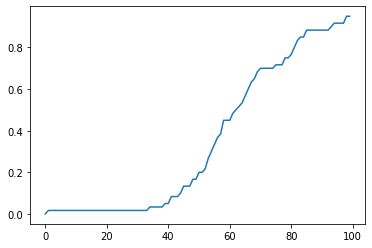

In [28]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [29]:
f.params["b"].value,f.params["d"].value

(1.2120218522542783, 164.90026181641986)

In [30]:
f,df2= getModel('TeenagerOpioidPrescriptions2020.csv')

    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.000000
4    4.0  0.000000
..   ...       ...
95  95.0  0.933333
96  96.0  0.933333
97  97.0  0.933333
98  98.0  0.933333
99  99.0  0.933333

[100 rows x 2 columns]


/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: 

In [31]:
f.params["b"].value,f.params["d"].value

(1.2052334174086299, 166.4528732159019)

In [32]:
df2

,rate,ccount
0,0.0,0.000000
1,1.0,0.000000
2,2.0,0.000000
3,3.0,0.000000
4,4.0,0.000000
...,...,...
95,95.0,0.933333
96,96.0,0.933333
97,97.0,0.933333
98,98.0,0.933333


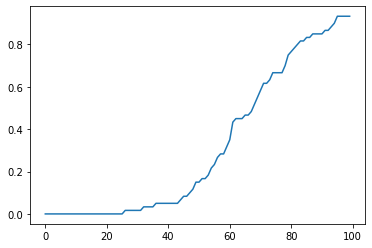

In [33]:
x = df2['rate']
y= df2['ccount']
plt.plot(x,y)

In [35]:
files = ['TeenagerOpioidPrescriptions2021.csv', 'TeenagerOpioidPrescriptions2020.csv','TeenagerOpioidPrescriptions2019.csv','TeenagerOpioidPrescriptions2018.csv']
bval = []
dval = []
year = []
for file in files:
    f,df2 = getModel(file)
    year.append(file)
    bval.append(f.params["b"].value)
    dval.append(f.params["d"].value)

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({"rate": key, "ccount":len(df[df['rate']<key])/60},ignore_index = True)
/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_34249/3353247315.py:9: 

    rate    ccount
0    0.0  0.000000
1    1.0  0.016667
2    2.0  0.016667
3    3.0  0.016667
4    4.0  0.016667
..   ...       ...
95  95.0  0.916667
96  96.0  0.916667
97  97.0  0.916667
98  98.0  0.950000
99  99.0  0.950000

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.000000
4    4.0  0.000000
..   ...       ...
95  95.0  0.933333
96  96.0  0.933333
97  97.0  0.933333
98  98.0  0.933333
99  99.0  0.933333

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.000000
4    4.0  0.000000
..   ...       ...
95  95.0  0.566667
96  96.0  0.566667
97  97.0  0.600000
98  98.0  0.633333
99  99.0  0.650000

[100 rows x 2 columns]
    rate    ccount
0    0.0  0.000000
1    1.0  0.000000
2    2.0  0.000000
3    3.0  0.000000
4    4.0  0.000000
..   ...       ...
95  95.0  0.333333
96  96.0  0.333333
97  97.0  0.383333
98  98.0  0.416667
99  99.0  0.433333

[100 rows x 2 c

In [36]:
bval

[1.2120218522542783,
 1.2052334174086299,
 1.0055866722132567,
 0.7571749479979617]

In [37]:
year

['TeenagerOpioidPrescriptions2021.csv',
 'TeenagerOpioidPrescriptions2020.csv',
 'TeenagerOpioidPrescriptions2019.csv',
 'TeenagerOpioidPrescriptions2018.csv']

In [38]:
dval

[164.90026181641986, 166.4528732159019, 199.97236538320846, 199.99978272653283]

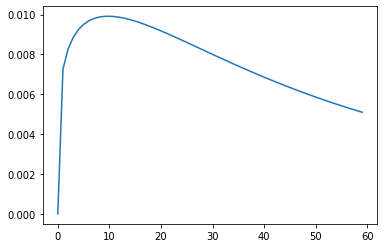

In [39]:
year_no=0
density_x=[]
rate_y=[]
for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2)) #derivativeofb&dequation
    rate_y.append(y_rate)

plt.plot(density_x,rate_y)

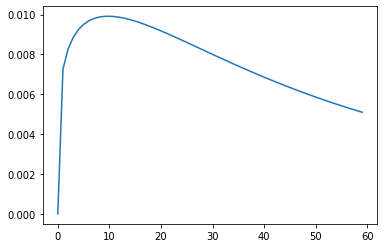

In [40]:
year_no=0
density_x=[]
rate_y=[]

for x in range(60):
    b = bval[year_no]
    d = dval[year_no]
    q = pow(x,b)
    density_x.append(x)
    y_rate=d*b*pow(x,b-1)/(pow((q+d),2))
    rate_y.append(y_rate)


plt.plot(density_x,rate_y)

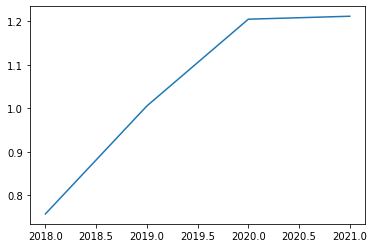

In [42]:
x = [2021,2020,2019,2018]
y = bval
plt.plot(x,y )

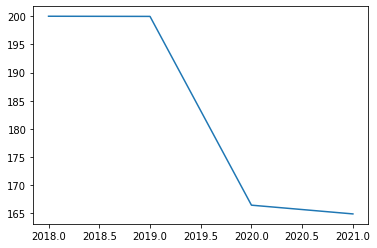

In [43]:
x = [2021,2020,2019,2018]
y = dval
plt.plot(x,y )

In [44]:
def prime3(x,b,d):
    q = pow(x,b)
    return (d*b*pow(x,b-1))/(pow((q+d),2))

In [45]:
plt.rcParams["figure.figsize"] = (20,10)

0
1
2
3


Text(0.5, 1.0, 'Density Curve: Teenager Opioid Prescription Rates')

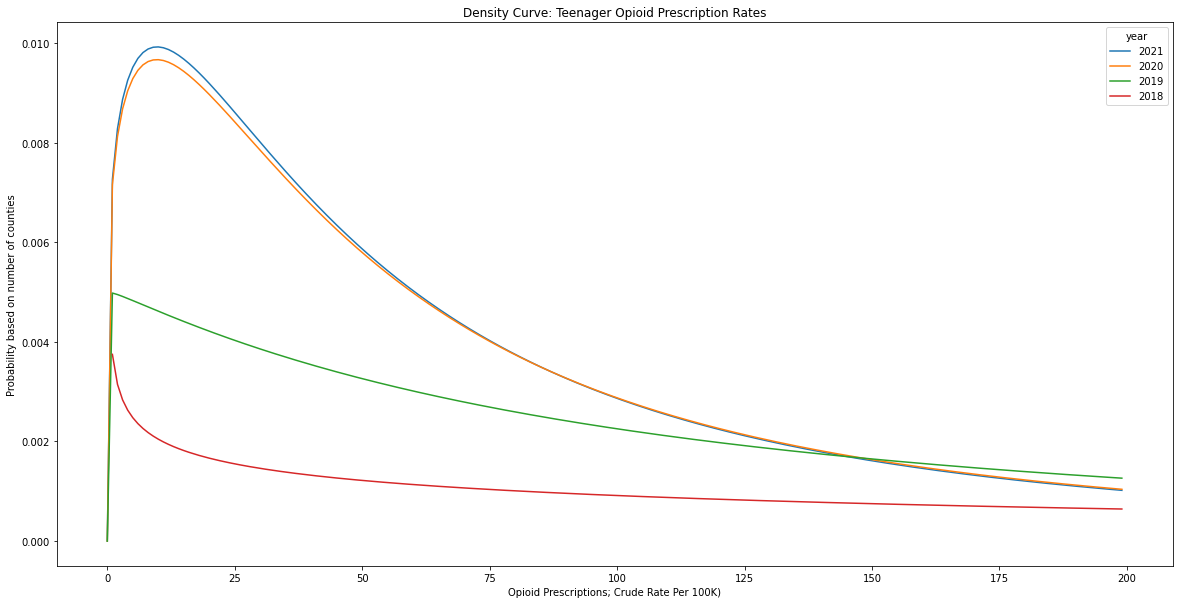

In [49]:
bval_1 = bval[0:4]
bval_1 = dval[0:4]
year2= [2021,2020,2019,2018]
for m in range(len(bval_1)):
    print(m)
    x = []
    y= []
    b = bval[m]
    d = dval[m]
    for i in range(200):
        x.append(i)
        y.append(prime3(x[i],b,d))
    plt.plot(x,y,label= str(year2[m]))
plt.legend(title='year')
plt.xlabel("Opioid Prescriptions; Crude Rate Per 100K)")
plt.ylabel("Probability based on number of counties")
plt.title("Density Curve: Teenager Opioid Prescription Rates")

/var/folders/h4/r6tpj_q56gb11bpc5pv3wfyr0000gn/T/ipykernel_89527/1062718043.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  return (d*b*pow(x,b-1))/(pow((q+d),2))


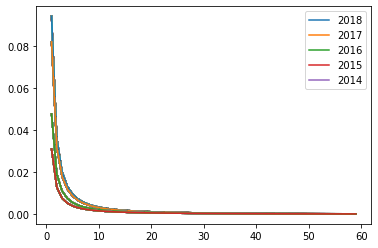

In [50]:
bval_2 = bval[4:]
dval_2 = dval[4:]
for m in range(len(bval_2)):
    x = []
    y= []
    b = bval_2[m]
    d = dval_2[m]
    for i in range(100):
        x.append(i)
        y.append(prime3(x[i],b,d))
        plt.plot(x,y,label= str(year2[m]))
    plt.plot(x,y)
plt.legend(["2018", "2017", "2016", "2015", "2014"])

In [ ]:
333